In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
import yfinance as yf
bitcoin = yf.Ticker("BTC-INR")

In [20]:
df=bitcoin.history(start="2001-01-01", end="2022-01-01", actions=False)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-30,4340448.00,4433189.0,4212004.5,4278323.00,2755022351063
2021-12-01,4271008.50,4418358.5,4243259.5,4293276.50,2765033882263
2021-12-02,4292341.50,4297464.5,4191520.0,4234772.00,2427887321387
2021-12-03,4237122.50,4319752.5,3950822.0,4036931.75,2996852175730
2021-12-04,4036890.75,4056680.0,3391807.5,3528483.75,4642923085824


In [21]:
df.shape

(805, 5)

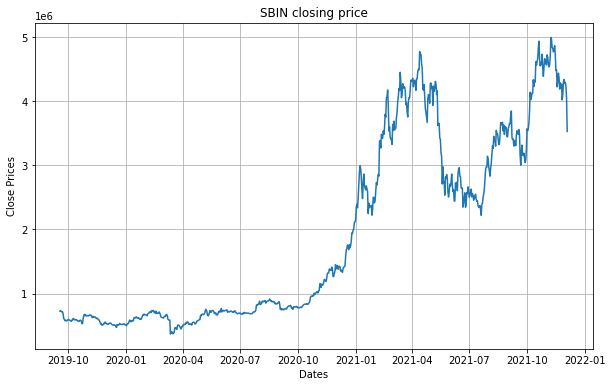

In [22]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('SBIN closing price')
plt.show()

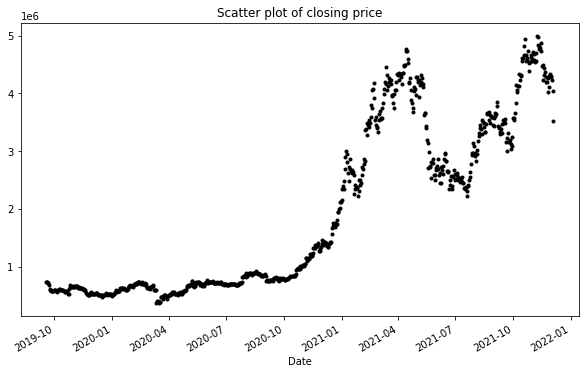

In [23]:
plt.figure(figsize=(10,6))
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

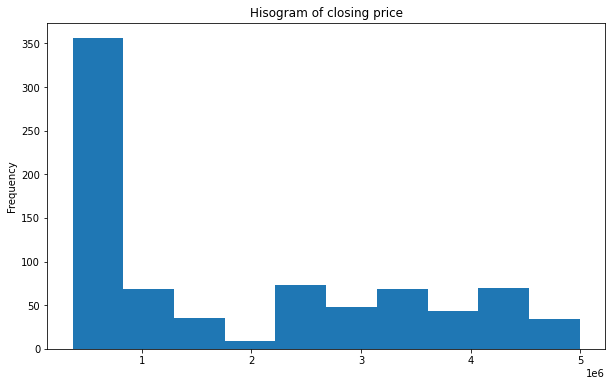

In [24]:
plt.figure(figsize=(10,6))
df_close = df['Close']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

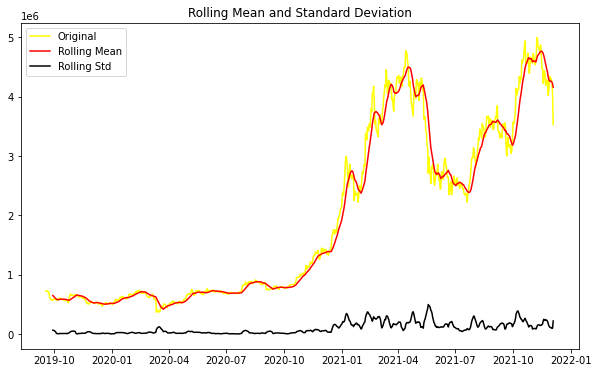

Results of dickey fuller test
Test Statistics                 -0.776435
p-value                          0.825946
No. of lags used                 0.000000
Number of observations used    804.000000
critical value (1%)             -3.438510
critical value (5%)             -2.865142
critical value (10%)            -2.568688
dtype: float64


In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df['Close'])

In [33]:
import statsmodels.api as sm
result = sm.tsa.seasonal_decompose(df_close, model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [32]:
df_close

Date
2019-09-18    7.259610e+05
2019-09-19    7.329512e+05
2019-09-20    7.249939e+05
2019-09-21    7.134639e+05
2019-09-22    7.170186e+05
                  ...     
2021-11-30    4.278323e+06
2021-12-01    4.293276e+06
2021-12-02    4.234772e+06
2021-12-03    4.036932e+06
2021-12-04    3.528484e+06
Name: Close, Length: 805, dtype: float64

No handles with labels found to put in legend.


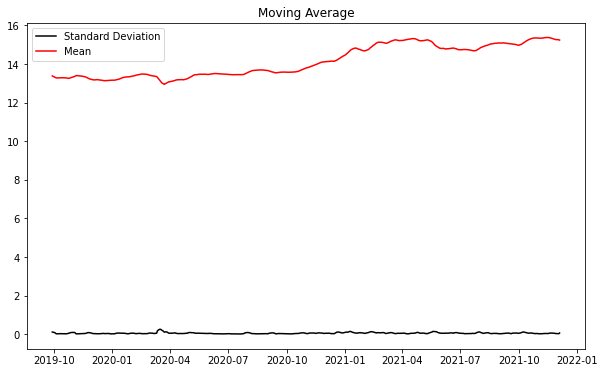

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

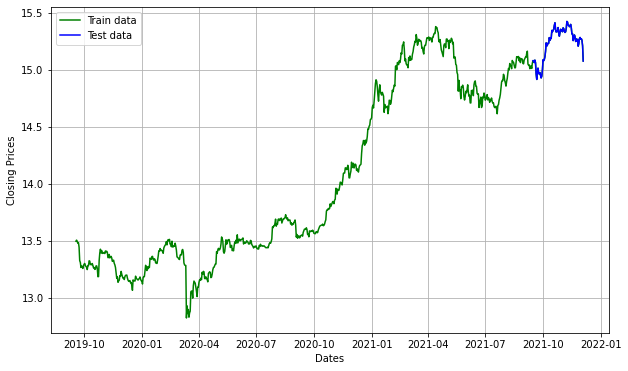

In [35]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [36]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2564.759, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2566.898, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2566.438, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2564.660, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2567.699, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2566.812, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2569.453, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2571.405, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2569.675, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2566.838, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2568.005, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2571.090, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.262 seconds
                               SARIMAX Results                              

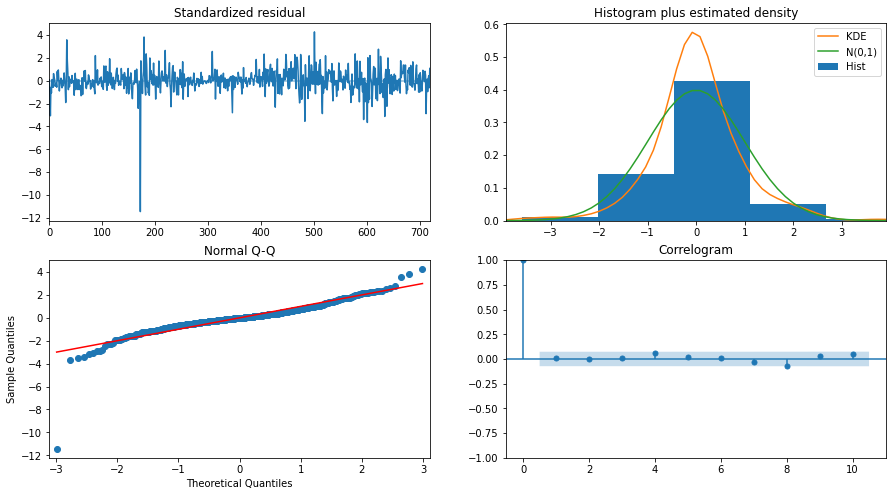

In [37]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [38]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [43]:
def get_current_price(symbol="AAPL"):
    ticker = yf.Ticker(symbol)
    todays_data = ticker.history(period='1d')
    print(todays_data)
#     return todays_data['Close'][0]
get_current_price('TSLA')

                   Open         High          Low        Close    Volume  \
Date                                                                       
2021-12-03  1084.790039  1090.575317  1000.210022  1014.969971  30516306   

            Dividends  Stock Splits  
Date                                 
2021-12-03          0             0  
